## Import Python Libraries 

In [145]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso
from sklearn import metrics   


## Read Dataset

In [146]:
df = pd.read_csv('CAR DETAILS.csv')

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [147]:
df.shape

(4340, 8)

In [148]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [150]:
# check Missing value present in dataset 

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [151]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [152]:
# check Duplicates prsent in dataset 

df.duplicated().sum()

763

In [153]:
# Handling of duplicates 

df.drop_duplicates(keep='first') 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [154]:
df.shape

(4340, 8)

In [155]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Encoding catgorical data 

In [156]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

### Encoding 'fuel type' column

In [157]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [158]:
df['fuel'] = encoder.fit_transform(df['fuel'])

In [159]:
df['fuel'].value_counts()

1    2153
4    2123
0      40
3      23
2       1
Name: fuel, dtype: int64

### Encoding 'Seller_type' column 

In [160]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [161]:
df['seller_type'] = encoder.fit_transform(df['seller_type'])

In [162]:
df['seller_type'].value_counts()

1    3244
0     994
2     102
Name: seller_type, dtype: int64

### Encoding of transmission column

In [163]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [164]:
df['transmission'] = encoder.fit_transform(df['transmission'])

In [165]:
df['transmission'].value_counts()

1    3892
0     448
Name: transmission, dtype: int64

### Encoding of 'owner' column 

In [166]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [167]:
df['owner'] = encoder.fit_transform(df['owner'])

In [168]:
df['owner'].value_counts()

0    2832
2    1106
4     304
1      81
3      17
Name: owner, dtype: int64

In [169]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


<Axes: >

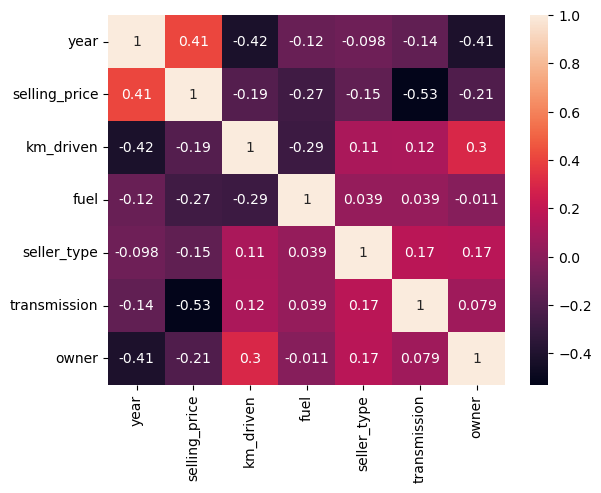

In [170]:
sns.heatmap(df.corr(),annot=True)

In [219]:
## Save cleaned Sample Dataset 

df.to_csv('sample_data.csv')

## Divide Dataset into Input and output dataset 

In [172]:
x = df.drop(['selling_price','name'] , axis = 1)
y = df['selling_price']

In [173]:
x.shape ,y.shape

((4340, 6), (4340,))

## Spliting Data into into Traing and Test Data 

In [174]:
from sklearn.model_selection import train_test_split 

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.20 ,random_state = 40)

In [175]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((3472, 6), (868, 6), (3472,), (868,))

## Model Training 

## 1. LinearRegression model 

In [183]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [184]:
## trainig the train data 

regression.fit(x_train , y_train)

LinearRegression()

##### Predication of test Data

In [185]:
y_pred_test = regression.predict(x_test)

In [186]:
y_pred_test

array([ 6.03940554e+05, -1.92270550e+04,  4.92593460e+05,  3.69533117e+05,
        4.01054005e+05,  1.60870673e+05,  7.70028130e+05,  6.92894726e+05,
        5.23373916e+04,  5.33068905e+05,  1.25535917e+05,  5.43153959e+05,
       -1.34215826e+05,  2.95753023e+05,  2.34966429e+05,  6.28769552e+05,
        2.12964734e+05,  3.26883632e+05, -4.98670315e+04,  4.18167589e+05,
       -6.95524204e+04,  1.02874294e+06,  1.69036225e+05,  8.09745717e+05,
        5.98272190e+05,  6.44815890e+05,  5.20414953e+05,  4.48877510e+05,
        2.43737383e+03,  7.20172016e+05,  5.53033969e+05,  6.46976442e+04,
        4.63426173e+05,  7.86721025e+05,  5.83975489e+05,  4.88978462e+05,
        1.64528013e+06,  3.23830014e+05,  1.24327978e+06,  4.09549672e+05,
        4.48845847e+05,  4.04430993e+05, -1.70059946e+04,  4.62681976e+05,
        1.21364154e+05,  2.46936403e+05,  3.20837521e+05,  5.09286356e+05,
        4.68673767e+05,  3.40206286e+05,  7.10000116e+05,  4.32310354e+05,
        3.98798824e+05,  

#####  Model Evaluation 

In [187]:
from sklearn.metrics import r2_score

score=r2_score(y_test,y_pred_test)
print(score)

0.4706444934865691


### 2.Lasso Regression 

In [220]:
from sklearn.linear_model import Lasso

In [221]:
# loading the linear regression model
lass_reg_model = Lasso()

In [222]:
lass_reg_model.fit(x_train,y_train)

Lasso()

In [227]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(x_train)

In [228]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.00015044399482233572


## 3. RandomForestRegressor model 

In [198]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

In [199]:
rf_reg.fit(x_train , y_train)

RandomForestRegressor()

In [200]:
y_pred = rf_reg.predict(x_test)

In [201]:
rf_reg.score(x_train , y_train)

0.9200178476362554

In [202]:
rf_reg.score(x_test , y_test)

0.6576466626053902

## save  model and load Model 

In [125]:
import pickle

pickle.dump(rf_reg,open('rf_regressor.pkl','wb'))

In [126]:
model =pickle.load(open('rf_regressor.pkl','rb'))

In [127]:
model.predict(x_test)

array([ 428048.11507936,  739899.49494949,  338404.52380952,
        622983.24603175,  396617.99603175,  725256.89121656,
        229999.        ,   91082.38095238,  455933.33333333,
        127503.985     ,  632763.85642136,  112658.33333333,
        150860.71428571,  335661.9047619 ,  730200.        ,
        905163.66325758,  337016.91082265,  132386.96428571,
        671500.        ,  440699.99      ,  623871.9047619 ,
        543759.99      ,  447200.        ,  461091.65666667,
        809760.        ,  360543.39744951,  169198.75      ,
        148703.0624127 ,  595710.        ,  253686.56746032,
        671409.10714286,  229712.18635939,  153825.        ,
        612349.4047619 ,  349427.08      ,  528246.10298701,
        362941.33333333,  739899.49494949,  330099.96      ,
        215308.65079365,  124720.        ,  234564.21052632,
        346471.42857143,  163570.        ,  566726.66666667,
        377934.28571429,  194553.86593617,  767449.20634921,
        468370.53961111,